# McCall Search Model

 ## Value function

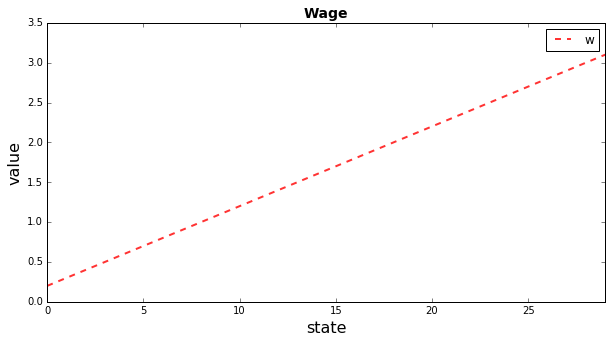

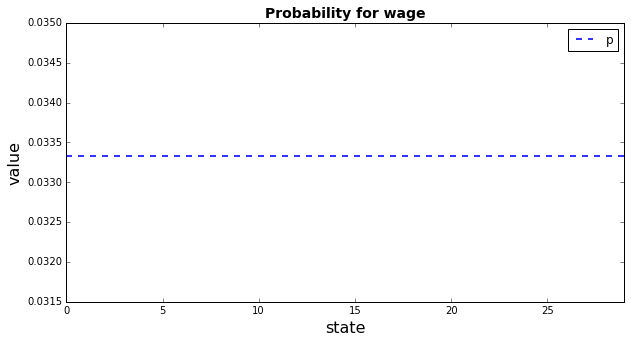

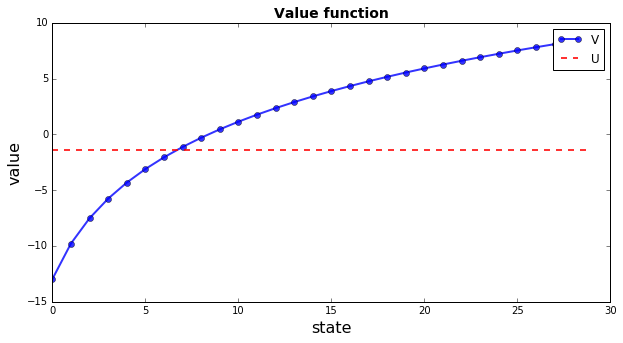

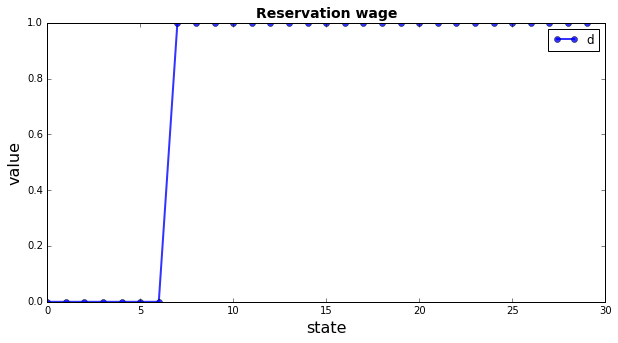

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
 

# == parameters == #
# lam: The job finding rate for currently unemployed workers
# alpha: The dismissal rate for currently employed workers
# beta: discount rate
# c: unemployment benefit

lam    = 0.35
alpha  = 0.03
beta   = 0.9
c      = 0.2
 

 

# N: number of different wage offers

N = 30 
 
# == wage offer vector: we set wage evenly between 0.5 and 5.5 == #
  
w  = np.zeros((N,1))

# == wage offer prob == #

p = np.zeros((N,1))


for i in range(0,N):
    w[i] =  c+i*0.1
    p[i] =  1.0/N
    
 

# == Plots == #
     
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, N-1)
ax.set_xlabel(r'state', fontsize=16)
ax.set_ylabel(r'value', fontsize=16)   
ax.plot(w, 'r--', lw=2, alpha=0.8, label=r'w')   
ax.legend(ncol=1)
plt.title(r"Wage", fontsize=14, fontweight='bold')
   
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, N-1)
ax.set_xlabel(r'state', fontsize=16)
ax.set_ylabel(r'value', fontsize=16)  
ax.plot(p, 'b--', lw=2, alpha=0.8, label=r'p')     
ax.legend(ncol=1)
plt.title(r"Probability for wage", fontsize=14, fontweight='bold')
plt.show()   


# == value function == #

V_old  = np.zeros((N,1))
U_old  = 0.0

V_new  = V_old
U_new  = U_old

for iteration in range(0,1000):
    
    U_new=np.log(c)+beta*(1-lam)*U_old
    
    for i in range(0,N):
        
        U_new=U_new+beta*lam*p[i]*max(U_old,V_old[i])
    
    for i in range(0,N):
        
        V_new[i]=np.log(w[i])+beta*(1-alpha)*V_old[i]+beta*alpha*U_old
        
        
    V_old=V_new
    U_old=U_new


# == Plots == #    

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, N)
ax.set_xlabel(r'state', fontsize=16)
ax.set_ylabel(r'value', fontsize=16)   
ax.plot(V_new, 'b-o', lw=2, alpha=0.8, label=r'V')   
ax.plot(U_new*np.ones((N,1)), 'r--', lw=2, alpha=0.8, label=r'U')  
ax.legend(ncol=1)
plt.title(r"Value function", fontsize=14, fontweight='bold')
 
plt.show()  



# == reservation wage == #


d  = np.zeros((N,1))

for i in range(0,N):

    if (U_new<V_new[i]):
        
        d[i]=1

# == Plots == #    

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, N)
ax.set_xlabel(r'state', fontsize=16)
ax.set_ylabel(r'value', fontsize=16)   
ax.plot(d, 'b-o', lw=2, alpha=0.8, label=r'd')    
ax.legend(ncol=1)
plt.title(r"Reservation wage", fontsize=14, fontweight='bold')
 
plt.show()  
        